# Data Analysis Project to explore flight Delays

##### David Herman, 10-5-2016

Goals:  
        1. Import Data Set
        2. Simple Data Exploration
        3. AutoUpdate via scraping of transtats website

In [1]:
%matplotlib inline
import os
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import pandas as pd
import glob
import seaborn as sns #using seaborn for plotting, finer control
import numpy as np

In [2]:
class FlightDelay(object):
    '''
    Class to scrape website to return pandas dataframe or
    return pandas dataframe from CSV file on computer. Helper functions 
    are included to analzye results.
    To Do: scraping, 
    '''
    def __init__(self, Web = False, dateRange=None, sampling =1.0):
        assert (Web is False and dateRange is None), 'web scraping in development'
        if not Web: #load local file
            #load the csv data files into a panda's data frame
            path = os.getcwd()                                         # use cwd
            all_files = glob.glob(os.path.join(path, "*.csv"))         # collect all csv files            
            if sampling < 1.0:
                #Randomly subsample from dataset to speed up analysis on low memory/CPU systems.
                df_from_each_file = (pd.read_csv(f, low_memory=False).sample(frac=sampling) for f in all_files)
            else:
                df_from_each_file = (pd.read_csv(f, low_memory=False) for f in all_files)
            self.df   = pd.concat(df_from_each_file, ignore_index=True)
            #Add DateTime series based on dataframe's series, using actual departure time
            self.df.DEP_TIME.fillna('1200.0',inplace=True) #Missing Hour/Minutes are set to Noon to allow for easier processing
            Time_df = pd.DataFrame({'year': self.df["YEAR"],
                                    'month': self.df["MONTH"],
                                    'day': self.df["DAY_OF_MONTH"],
                                    'hour': self.df["DEP_TIME"].astype(str).str[0:-4].replace('','00'),   #UTC style Hour+Minute  eg.  858, 1040
                                    'minute': self.df["DEP_TIME"].astype(str).str[-4:-2]})   
            self.df['DATE_TIME'] = pd.to_datetime(Time_df,exact = False)
            self.df.set_index(self.df['DATE_TIME'],inplace = True)
            if 'DEP_DELAY_FILLED' not in FD.df:
                FD.df['DEP_DELAY_FILLED'] = FD.df['DEP_DELAY'].fillna(0)

        else: #Scrape http://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time
            pass
                
    def update(self):
        #Update data frame with data pull down from website
        pass
    def delayList(self):
        #returns list of flight delays
        pass
    def delayHist(self,column = 'DEP_DELAY'):
        f, ax = plt.subplots(figsize=(10, 5))
        ax.set_yscale("log", nonposy='clip') 
        plt.hist(self.df[column].dropna(),bins=25)
        ax.set(title="Log-Histogram Plot of "+column)
    def cumDelayHist(self,column = 'DEP_DELAY'):
        #To Do
        Pass
    #Other methods

In [3]:
FD = FlightDelay(sampling = 0.1) #Randomly subsample at 10% of original data set to ease speed of computation

In [65]:
FD.df['DATE_TIME'].head(15)

DATE_TIME
2015-02-01 08:57:00   2015-02-01 08:57:00
2015-02-02 12:00:00   2015-02-02 12:00:00
2015-02-03 08:56:00   2015-02-03 08:56:00
2015-02-04 08:55:00   2015-02-04 08:55:00
2015-02-05 08:53:00   2015-02-05 08:53:00
2015-02-06 08:58:00   2015-02-06 08:58:00
2015-02-07 08:55:00   2015-02-07 08:55:00
2015-02-08 08:57:00   2015-02-08 08:57:00
2015-02-09 09:27:00   2015-02-09 09:27:00
2015-02-10 08:58:00   2015-02-10 08:58:00
2015-02-11 08:56:00   2015-02-11 08:56:00
2015-02-12 09:06:00   2015-02-12 09:06:00
2015-02-13 09:31:00   2015-02-13 09:31:00
2015-02-14 08:56:00   2015-02-14 08:56:00
2015-02-15 08:57:00   2015-02-15 08:57:00
Name: DATE_TIME, dtype: datetime64[ns]

In [66]:
FD.df['DEP_DELAY'].dropna().describe()

count    872765.000000
mean          9.260464
std          37.309789
min         -61.000000
25%          -5.000000
50%          -2.000000
75%           7.000000
max        1631.000000
Name: DEP_DELAY, dtype: float64

In [67]:
FD.df['DEP_DELAY'].head() #Delta in Minutes between actual departure and schedule departure

DATE_TIME
2015-02-01 08:57:00   -3.0
2015-02-02 12:00:00    NaN
2015-02-03 08:56:00   -4.0
2015-02-04 08:55:00   -5.0
2015-02-05 08:53:00   -7.0
Name: DEP_DELAY, dtype: float64

Nan:  4285


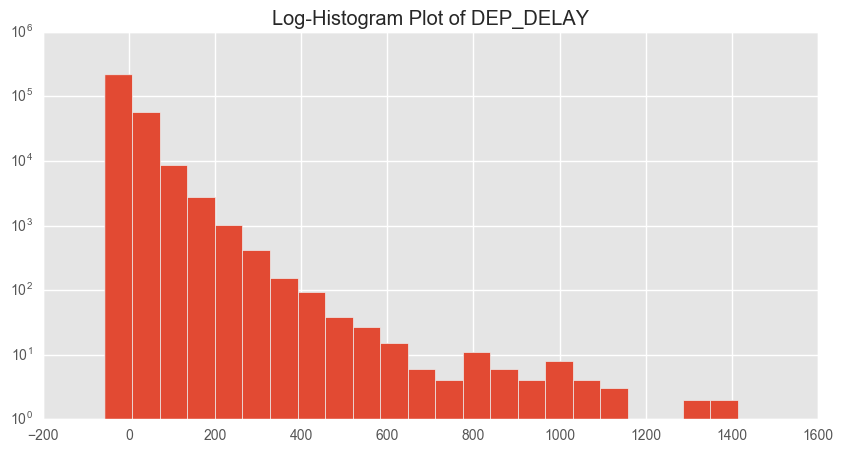

In [25]:
print 'Nan: ',FD.df['DEP_DELAY'].isnull().sum()
FD.delayHist('DEP_DELAY')

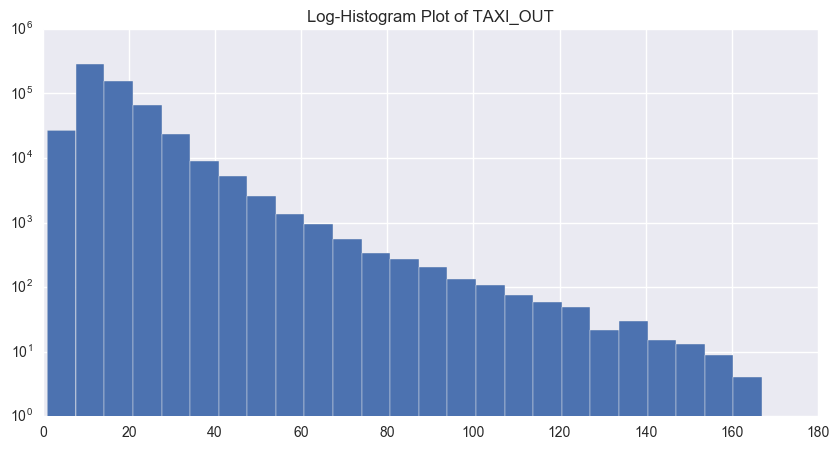

In [9]:
FD.delayHist('TAXI_OUT')

In [69]:
#cumulative distribution plot, To Do

In [10]:
import platform
platform.architecture()
if 'DEP_DELAY_FILLED' not in FD.df:
    FD.df['DEP_DELAY_FILLED'] = FD.df['DEP_DELAY'].fillna(0)
if 'TAXI_OUT_FILLED' not in FD.df:
    FD.df['TAXI_OUT_FILLED'] = FD.df['TAXI_OUT'].fillna(0)

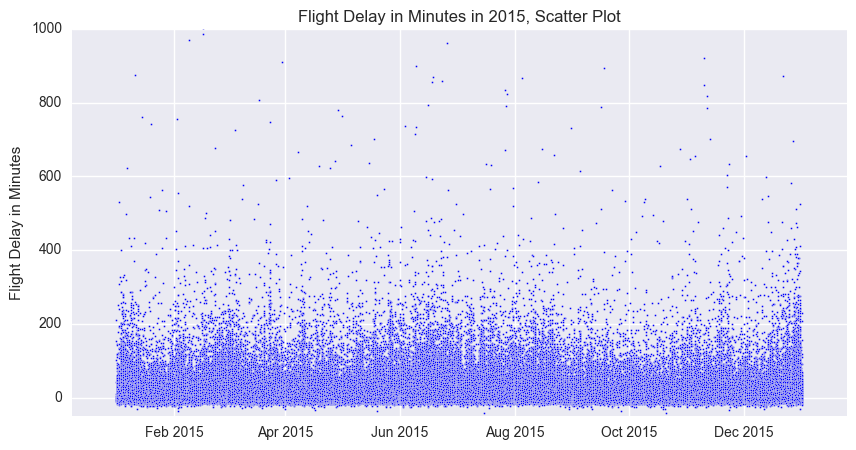

In [5]:
#All Plane Delays
f, ax = plt.subplots(figsize=(10, 5))
ax.set_ylim(bottom=-50,top = 1000)
ax.set_title('Flight Delay in Minutes in 2015, Scatter Plot')
plt.ylabel('Flight Delay in Minutes')
#X = FD.df[timeunit][FD.df['DEP_DELAY'].notnull()]
#Y = FD.df['DEP_DELAY'][FD.df['DEP_DELAY'].notnull()]
#prob = 0.01
#samp = np.random.choice([True,False], p = [prob,1.0-prob], size = X.size)
if 'DEP_DELAY_FILLED' not in FD.df:
    FD.df['DEP_DELAY_FILLED'] = FD.df['DEP_DELAY'].fillna(0)

plt.scatter(FD.df.index,FD.df['DEP_DELAY'],s=2.2)


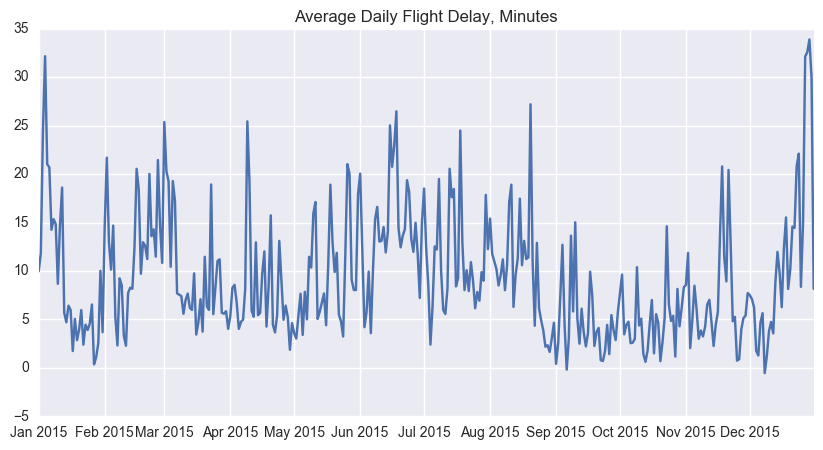

In [4]:
#Average Daily Flight Delay, grouped by Day
#Now Let's understand the daily average and quantile variation per each airport
Daily_summary = pd.DataFrame()
Daily_summary['DEP_DELAY'] = FD.df['DEP_DELAY'].resample('D').mean()
f, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Average Daily Flight Delay, Minutes')
ax.plot(Daily_summary.index,Daily_summary['DEP_DELAY'])

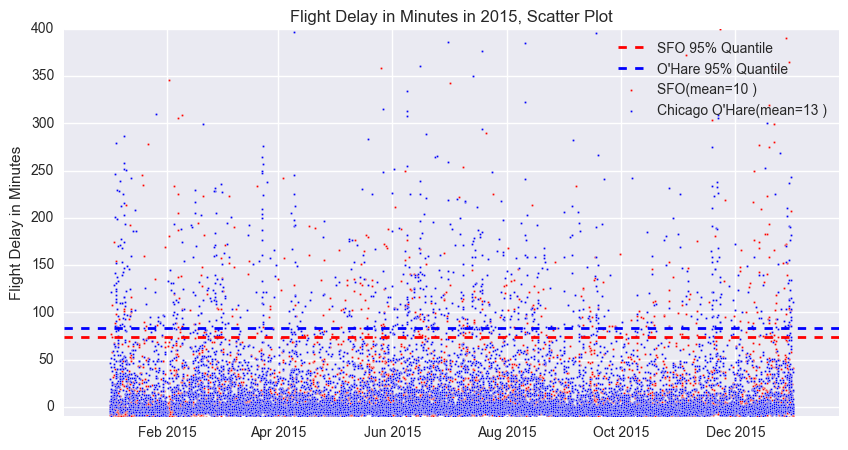

In [6]:
#Scatter PLot of Delays in Chicago and San Franciso
f, ax = plt.subplots(figsize=(10, 5))
ax.set_ylim(bottom=-10,top = 400)
ax.set_title('Flight Delay in Minutes in 2015, Scatter Plot')
plt.ylabel('Flight Delay in Minutes')
#Mean dealy
mean_delay_SFO = FD.df['DEP_DELAY'][FD.df['ORIGIN'] =='SFO'].mean()
mean_delay_ORD = FD.df['DEP_DELAY'][FD.df['ORIGIN'] =='ORD'].mean()

#Scatter Plot
plt.scatter(FD.df.index[FD.df['ORIGIN'] =='SFO'],
            FD.df['DEP_DELAY'][FD.df['ORIGIN'] =='SFO'],
            s=3.0,c='r',label='SFO(mean='+str(int(mean_delay_SFO))+' )')
plt.scatter(FD.df.index[FD.df['ORIGIN'] =='ORD'],
            FD.df['DEP_DELAY'][FD.df['ORIGIN'] =='ORD'],
            s=3.0,c='b',label='Chicago O\'Hare(mean='+str(int(mean_delay_ORD))+' )')
#95% Quantile
plt.axhline(y=FD.df['DEP_DELAY_FILLED'][FD.df['ORIGIN'] =='SFO'].quantile(q=0.95), 
            xmin=0.0, xmax=1.0,ls='--', linewidth=2, color = 'r',label = 'SFO 95% Quantile')
plt.axhline(y=FD.df['DEP_DELAY_FILLED'][FD.df['ORIGIN'] =='ORD'].quantile(q=0.95), 
            xmin=0.0, xmax=1.0,ls ='--', linewidth=2, color = 'b',label = 'O\'Hare 95% Quantile')
#Increase Legend icon size
lgnd = plt.legend()
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]

C:\Users\Robo\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
C:\Users\Robo\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)


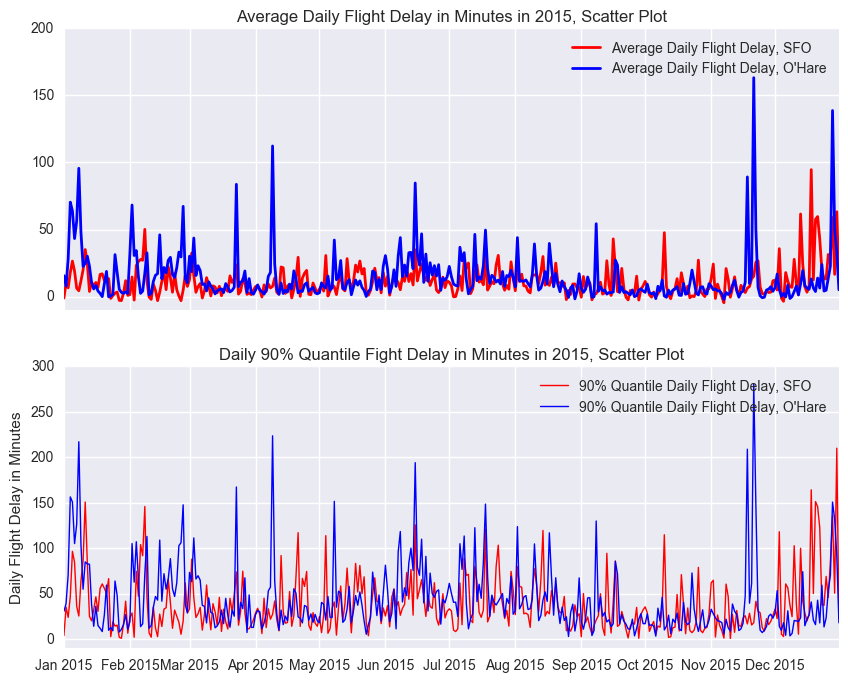

In [8]:
#Now Let's understand the daily average and quantile variation per each airport
Daily_summary = pd.DataFrame()
Daily_summary['DEP_DELAY_MEAN_SFO'] = FD.df['DEP_DELAY'][FD.df['ORIGIN'] =='SFO'].resample('D').mean()
Daily_summary['DEP_DELAY_MEAN_ORD'] = FD.df['DEP_DELAY'][FD.df['ORIGIN'] =='ORD'].resample('D').mean()
Daily_summary['DEP_DELAY_QUAN95_SFO'] = FD.df['DEP_DELAY_FILLED'][FD.df['ORIGIN'] =='SFO'].resample('D', 
        how=lambda x: np.percentile(x, q=90))
Daily_summary['DEP_DELAY_QUAN95_ORD'] = FD.df['DEP_DELAY_FILLED'][FD.df['ORIGIN'] =='ORD'].resample('D',
        how=lambda x: np.percentile(x, q=90)) 
f, (ax,ax2) = plt.subplots(2, sharex=True,figsize=(10, 8))
ax.set_ylim(bottom=-10,top = 200)
ax.set_title('Average Daily Flight Delay in Minutes in 2015, Scatter Plot')
ax2.set_ylim(bottom=-10,top = 300)
ax2.set_title('Daily 90% Quantile Fight Delay in Minutes in 2015, Scatter Plot')
plt.ylabel('Daily Flight Delay in Minutes')
ax.plot(Daily_summary.index,Daily_summary['DEP_DELAY_MEAN_SFO'],c='r',lw=2,label = 'Average Daily Flight Delay, SFO')
ax.plot(Daily_summary.index,Daily_summary['DEP_DELAY_MEAN_ORD'],c='b',lw=2,label = 'Average Daily Flight Delay, O\'Hare')
ax2.plot(Daily_summary.index,Daily_summary['DEP_DELAY_QUAN95_SFO'],c='r',ls='-',lw=1,
        label = '90% Quantile Daily Flight Delay, SFO')
ax2.plot(Daily_summary.index,Daily_summary['DEP_DELAY_QUAN95_ORD'],c='b',ls='-',lw=1,
        label = '90% Quantile Daily Flight Delay, O\'Hare')
ax.legend()
ax2.legend()

C:\Users\Robo\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
C:\Users\Robo\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)


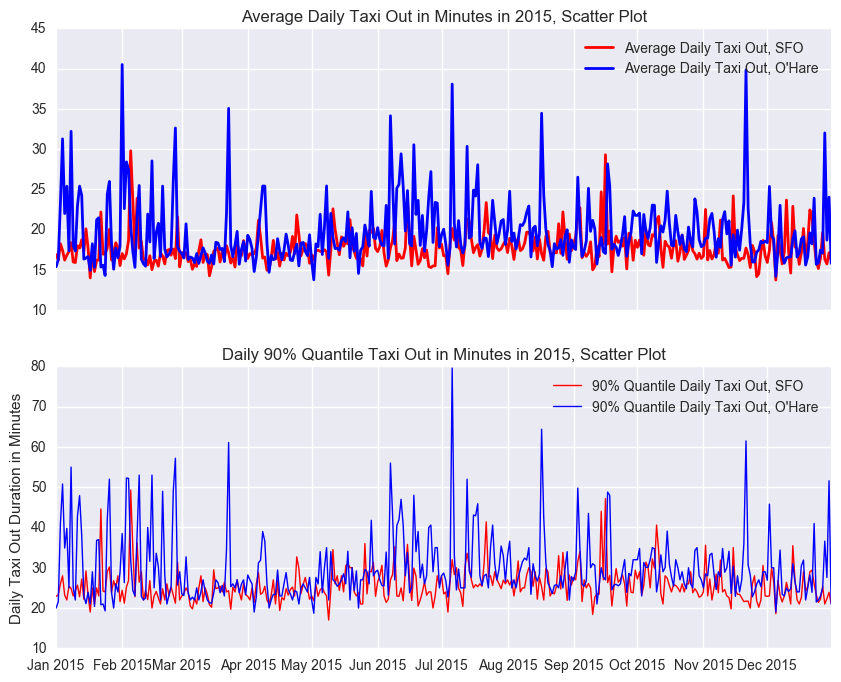

In [13]:
#Now Let's understand the daily average and quantile variation per each airport
Daily_summary = pd.DataFrame()
Daily_summary['TAXI_OUT_MEAN_SFO'] = FD.df['TAXI_OUT'][FD.df['ORIGIN'] =='SFO'].resample('D').mean()
Daily_summary['TAXI_OUT_MEAN_ORD'] = FD.df['TAXI_OUT'][FD.df['ORIGIN'] =='ORD'].resample('D').mean()
Daily_summary['TAXI_OUT_QUAN95_SFO'] = FD.df['TAXI_OUT_FILLED'][FD.df['ORIGIN'] =='SFO'].resample('D', 
        how=lambda x: np.percentile(x, q=90))
Daily_summary['TAXI_OUT_QUAN95_ORD'] = FD.df['TAXI_OUT_FILLED'][FD.df['ORIGIN'] =='ORD'].resample('D',
        how=lambda x: np.percentile(x, q=90)) 
f, (ax,ax2) = plt.subplots(2, sharex=True,figsize=(10, 8))
#ax.set_ylim(bottom=-10,top = 200)
ax.set_title('Average Daily Taxi Out in Minutes in 2015, Scatter Plot')
#ax2.set_ylim(bottom=-10,top = 300)
ax2.set_title('Daily 90% Quantile Taxi Out in Minutes in 2015, Scatter Plot')
plt.ylabel('Daily Taxi Out Duration in Minutes')
ax.plot(Daily_summary.index,Daily_summary['TAXI_OUT_MEAN_SFO'],c='r',lw=2,label = 'Average Daily Taxi Out, SFO')
ax.plot(Daily_summary.index,Daily_summary['TAXI_OUT_MEAN_ORD'],c='b',lw=2,label = 'Average Daily Taxi Out, O\'Hare')
ax2.plot(Daily_summary.index,Daily_summary['TAXI_OUT_QUAN95_SFO'],c='r',ls='-',lw=1,
        label = '90% Quantile Daily Taxi Out, SFO')
ax2.plot(Daily_summary.index,Daily_summary['TAXI_OUT_QUAN95_ORD'],c='b',ls='-',lw=1,
        label = '90% Quantile Daily Taxi Out, O\'Hare')
ax.legend()
ax2.legend()